# Retail Analysis with Supply Chain Store 
by Rajeev Kumar on February 19th , 2021

### import packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import math

### Read csv file Retail store_sales.csv as a dataframe for working 

In [2]:
wal = pd.read_csv("Retail_Store_sales.csv")

In [3]:
# find basic information of data frame 
print (f"shape of data is {wal.shape} and size of data is {wal.size}")
# Check varius parameter of data frame using instruction  wal.dtypes ,wal.isnull().sum() , wal.describe()
wal.head(2)

shape of data is (6435, 8) and size of data is 51480


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [4]:
wal.info()     # check information on Data Frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
wal.describe()    # Find basis statistics parameter of dataframe

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
wal.isnull().sum()   #  alternate be wal.isnull(). any()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
wal.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [8]:
wal.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# Analysis of store having maximum, Min  sales

In [9]:
# find there total sales as groupby each store
store_group= wal.groupby('Store').agg({'Weekly_Sales':'sum'})
#store_group= wal.groupby('Store').agg({'Weekly_Sales' : "sum", "Temperature": "mean", 'Fuel_Price' : "max", "CPI":"min",  'Unemployment': "mean"})
store_group

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [10]:
# Store with max sales
store_group[store_group.Weekly_Sales == store_group.Weekly_Sales.max()]

,Weekly_Sales
Store,
20,3.013978e+08


In [11]:
# get sales of store hacing min sales
store_group[store_group.Weekly_Sales == store_group.Weekly_Sales.min()]

,Weekly_Sales
Store,
33,37160221.96


###  Store 20 have maximum sales as per data file of 3.013978e+08   Store 33 have minimum sales of 37160221.96

### Store has maximum and Minimum standard deviation

In [12]:
#get deviation of sales of each store
store_group_std = wal.groupby('Store').agg({'Weekly_Sales':'std'})
store_group_std

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745
6,212525.855862
7,112585.469220
8,106280.829881
9,69028.666585


In [13]:
#get store having maximum store deviation   317569.949476
store_group_std[store_group_std.Weekly_Sales == store_group_std.Weekly_Sales.max()]

,Weekly_Sales
Store,
14,317569.949476


In [14]:
#get store having min store deviation   
store_group_std[store_group_std.Weekly_Sales == store_group_std.Weekly_Sales.min()]

,Weekly_Sales
Store,
37,21837.46119


###  14th  store has maximum standard deviation of   317570  and store 37 have min standard deviation 21837, so store 33 is most consistant one.

###  Coeffiecient of mean to standard deviation

In [15]:
mean_value = wal.Weekly_Sales.mean()
std_value = wal.Weekly_Sales.std()
coefficient1 =std_value/mean_value
coefficient = mean_value/std_value
round (coefficient,2), np.round(coefficient1,2)

(1.86, 0.54)

### Coeffiecient of mean to standard deviation is 1.86

### Which store/s has good quarterly growth rate in Q3’2012

In [16]:
# import datetime package
from datetime import datetime
print (wal.head(3)) 
wal.shape

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  


(6435, 8)

In [17]:
#Check what type item this Date colum have 
type(wal.iloc[0,1]) , type(wal["Date"][0])
#for i in range (0,6435):
    #print (type(wal.iloc[i,1]))"

(str, str)

In [18]:
wal["Date"][0:5]

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object

In [19]:
# convert str to datetime
def convert_datetime(x):
    return datetime.strptime(x,"%d-%m-%Y")   
#check conversion using function ......    convert_datetime(wal.iloc[0,1])

In [20]:
wal['Date'] = wal.Date.apply(convert_datetime)

In [21]:
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [22]:
type(wal["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
# function to filter Q3 dates
def filter_date_q3(x):
    if x.month > 8 and x.year==2012:
        return True
    else:
        return False

In [24]:
# function to filter Q2 Dates
def filter_date_q2(x):
    if x.month <= 8 and x.month>4 and x.year==2012:
        return True
    else:
        return False

In [25]:
# get average sales of Q2 and Q3 
grouped_Q3 = wal[wal.Date.apply(filter_date_q3)].groupby(['Store']).agg({'Weekly_Sales':'mean'})
grouped_Q2 = wal[wal.Date.apply(filter_date_q2)].groupby(['Store']).agg({'Weekly_Sales':'mean'})
# subtract average growth of each store with Q2 and Q3
df1 = (grouped_Q3-grouped_Q2)
# get max store growth rate
df1[df1.Weekly_Sales == df1.Weekly_Sales.max()]

,Weekly_Sales
Store,
17,62248.312639


### Which store/s has good quarterly growth rate in Q3’2012:  Store 17 have growth 62248.312639 

### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [26]:
# mean sales in non-holiday season for all stores together
mean_non_season_non_holidays_sales = wal[wal.Holiday_Flag == 0].agg({'Weekly_Sales':'mean'})
mean_non_season_non_holidays_sales

Weekly_Sales    1.041256e+06
dtype: float64

In [27]:
# function to find holidays which have higher sales than the mean sales
def more_sale_check(x):
    if x > mean_non_season_non_holidays_sales[0]:
        return True
    else:
        return False

In [28]:
#get holiday_weeks which have higher sales than non holiday weeks
holidays_week_of_higher_slaes = wal[wal.Holiday_Flag == 1] .loc[wal.Weekly_Sales.apply(more_sale_check)]
holidays_week_of_higher_slaes

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


In [29]:
holidays_week_of_higher_slaes.set_index('Store',inplace=True)

In [30]:
#total holiday weeks
holidays_week_of_higher_slaes[['Date']]

,Date
Store,
1,2010-02-12
1,2010-09-10
1,2010-11-26
1,2010-12-31
1,2011-02-11
...,...
41,2011-12-30
41,2012-02-10
41,2012-09-07


### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together:  Above list of 220 element have weekly slaes higher then average slese of non-holiday season.


### Provide a monthly and semester view of sales in unit and give insights 

In [31]:
# Use date colum to make new colums for Day, Month and Year for further prediction 

In [32]:
wal['Days']=wal.Date.apply(lambda x: x.day)
wal['Months']=wal.Date.apply(lambda x: x.month)
wal['Years']=wal.Date.apply(lambda x: x.year)
wal['Days']=wal.Date.apply(lambda x: x.weekday())
#wal['Days']=wal.Days.apply(lambda x: 'Friday' if x ==4)
wal

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


In [33]:
# find there total sales as groupby each store on monthly basis
store_group_yearly= wal.groupby('Years').agg({'Weekly_Sales':'sum', })
store_group_yearly

,Weekly_Sales
Years,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


###   Provide a monthly and semester view of sales in unit and give insights

###### Q6 Statistical Model  For Store 1 Build  prediction models to forecast demand
Q6.1 - Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in   order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [34]:
#Store 1 dataframe be as below 
wal_store1=wal.loc[wal['Store']==1]
wal_store1.head()   #wal_store1.shape

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Months,Years
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [35]:
import datetime
import calendar

In [36]:
# Below time conversion not required at done already above 
"""
def find_day_of_date(date):
    born = datetime.strptime(date, '%d-%m-%Y').weekday()
    return (calendar.day_name[born])

# Driver program
date1 = wal_store1.iloc[4,1]
date=str(date1)
print(find_day_of_date(date))

"""

"\ndef find_day_of_date(date):\n    born = datetime.strptime(date, '%d-%m-%Y').weekday()\n    return (calendar.day_name[born])\n\n# Driver program\ndate1 = wal_store1.iloc[4,1]\ndate=str(date1)\nprint(find_day_of_date(date))\n\n"

In [37]:
###Creating Statistical Model 
import matplotlib.pyplot as plt

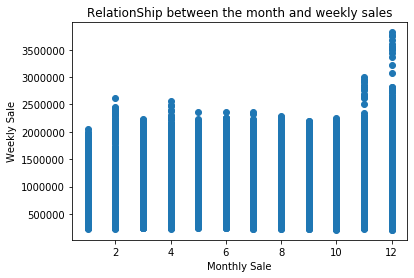

In [38]:
plt.scatter(wal.Months,wal.Weekly_Sales)
plt.title("RelationShip between the month and weekly sales")
plt.xlabel('Monthly Sale')
plt.ylabel('Weekly Sale')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

In [40]:
wal.drop('Date',axis=1,inplace=True)
#wal.drop('Days',axis=1,inplace=True)
wal.drop('Months',axis=1,inplace=True)
wal.drop('Years',axis=1,inplace=True)
wal

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,4
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4


In [41]:
wal.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Days'],
      dtype='object')

In [42]:
wal.index

RangeIndex(start=0, stop=6435, step=1)

In [43]:
wal.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Days            0
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split as split
train, test =split(wal, test_size=0.3, random_state=12)

In [45]:
x=wal.drop('Weekly_Sales',axis=1)
y=wal['Weekly_Sales']


In [46]:
lr=LinearRegression()

In [47]:
lr.fit(x,y)

LinearRegression()

In [48]:
print(lr.intercept_)
print(lr.coef_)

1995738.2607673658
[-15388.66386908  73034.45592814   -975.40194689   9596.07385633
  -2319.4557703  -21881.17087118      0.        ]


In [49]:
# R squared value  it is measure of errro in fit process 
print('R Squared = ', round (lr.score(x,y)*100,2))
from math import sqrt

R Squared =  14.16


In [50]:
# RMSE --> Root Mean Squared Error   measure of error here in fit process  = mean of square of (y predicted - y actual)
# RSME =  (Y predict = Y Actual ) **2  and then mean of same 
y_predict=lr.predict(x)
residual =y_predict - y
residual_square=residual **2
mean_of_residual =(residual **2).mean()
square_root_of_mean_of_residual= sqrt (mean_of_residual)
RSME =square_root_of_mean_of_residual
print ("RSME:" , round (RSME*100,2))

RSME: 52285822.9


In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
RMSE = sqrt(mean_squared_error(y_true = y, y_pred = y_predict))
RSME

522858.2290428737

In [53]:
pred_train=lr.predict(x)
#pred_test=lr.predict(x)
pred_train

array([1296764.00528581, 1372936.47928259, 1298081.73405091, ...,
        652763.84457868,  650507.23833249,  647401.84762066])

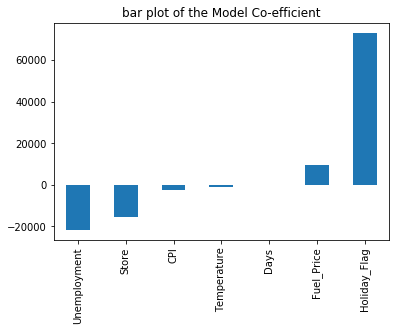

In [54]:
predictors =x.columns
coef=pd.Series(lr.coef_, predictors).sort_values()
coef.plot(kind='bar',title='bar plot of the Model Co-efficient')

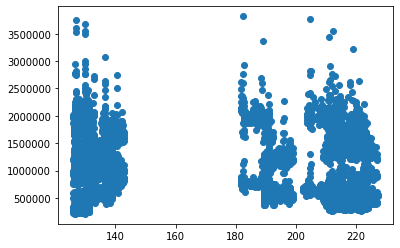

In [55]:
plt.scatter(wal.CPI,wal.Weekly_Sales)

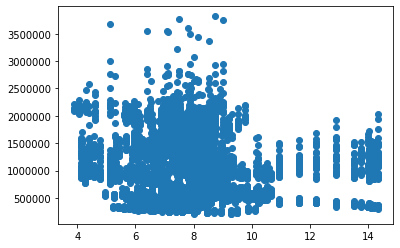

In [56]:
plt.scatter(wal.Unemployment,wal.Weekly_Sales)

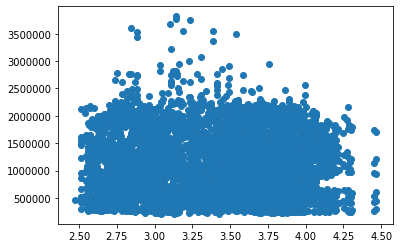

In [57]:
plt.scatter(wal.Fuel_Price,wal.Weekly_Sales)

In [58]:
# with the above bar plots it is indicating that uneployment is critical factor, with increasing of the unemployment weakly sales is going to be increase

In [59]:
pd.DataFrame({'Actual':wal.Weekly_Sales,'Predicted':lr.predict(x)})

,Actual,Predicted
0,1643690.90,1.296764e+06
1,1641957.44,1.372936e+06
2,1611968.17,1.298082e+06
3,1409727.59,1.291927e+06
4,1554806.68,1.292597e+06
...,...,...
6430,713173.95,6.429368e+05
6431,733455.07,6.428200e+05
6432,734464.36,6.527638e+05
6433,718125.53,6.505072e+05


### Q6.2 - Change dates into days by creating new variable


In [60]:
wal.Days

0       4
1       4
2       4
3       4
4       4
       ..
6430    4
6431    4
6432    4
6433    4
6434    4
Name: Days, Length: 6435, dtype: int64

In [61]:
wal['Day_Name']=wal.Days.apply(lambda x: 'Friday' if (x == 4) else 'Other Day')
wal

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Days,Day_Name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,Friday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,Friday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,Friday
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,Friday
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,4,Friday
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,4,Friday
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,Friday


### END Here 